In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Schemes and initial data

In [74]:
def u01(x):
    return np.sin(2*np.pi*x)

def u02(x):
    y = np.mod(x,1)
    if y < 0.25:
        return 0.0
    elif y < 0.75: 
        return 1.0
    else:
        return 0.0

#exact solution
def u_sol(x,t,a,u0):
    return u0(x-a*t)

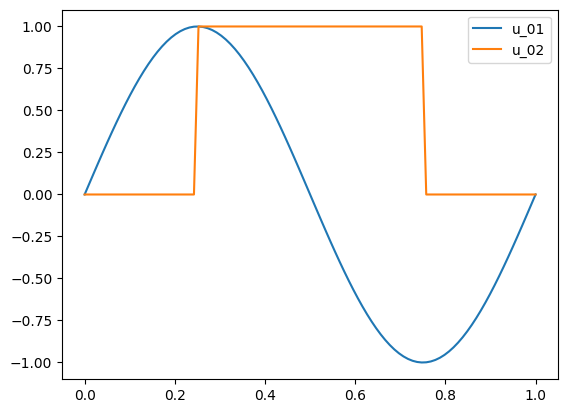

In [75]:
x = np.linspace(0,1,100)
y01 = [u01(z) for z in x]
y02 = [u02(z) for z in x]
fig, ax = plt.subplots()
ax.plot(x,y01,label="u_01")
ax.plot(x,y02,label="u_02")
plt.legend()
plt.show()

In [125]:
"""
Assume that u0 is periodic
J = number of space steps
T = time period
n = number of time steps
"""
def lax_wendroff(J,T,n,u0,a): 
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    for i in range(n):
        out[i+1,0] = (1-nu**2)*out[i,0]+0.5*(nu**2-nu)*out[i,1]+0.5*(nu**2+nu)*out[i,J-1]
        out[i+1,J-1] = (1-nu**2)*out[i,J-1]+0.5*(nu**2-nu)*out[i,0]+0.5*(nu**2+nu)*out[i,J-2]
        for k in range(1,J-1):
            out[i+1,k] = (1-nu**2)*out[i,k]+0.5*(nu**2-nu)*out[i,k+1]+0.5*(nu**2+nu)*out[i,k-1]
    return out
        
def centered_explicit(J,T,n,u0,a):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    for i in range(n):
        out[i+1,0] = out[i,0]-0.5*nu*out[i,1]+0.5*nu*out[i,J-1]
        out[i+1,J-1] = out[i,J-1]-0.5*nu*out[i,0]+0.5*nu*out[i,J-2]
        for k in range(1,J-1):
            out[i+1,k] = out[i,k]-0.5*nu*out[i,k+1]+0.5*nu*out[i,k-1]
    return out

def centered_implicit(J,T,n,u0,a):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    A = np.diag(np.ones(J)) - 0.5*nu*np.diag(np.ones(J-1),1) + 0.5*nu*np.diag(np.ones(J-1),-1)
    A[0,J-1] = 0.5*nu
    A[J-1,0] = -0.5*nu
    for i in range(n):
        out[i+1,:] = np.linalg.solve(A,out[i,:])
    return out

def upwind(J,T,n,u0,a):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    for i in range(n):
        out[i+1,0] = out[i,0]-nu*out[i,0]+nu*out[i,J-1]
        for k in range(1,J):
            out[i+1,k] = out[i,k]-nu*out[i,k]+nu*out[i,k-1]
    return out

## Smooth initial data

### Case $\nu = \frac{a \Delta t}{\Delta x} = 1$

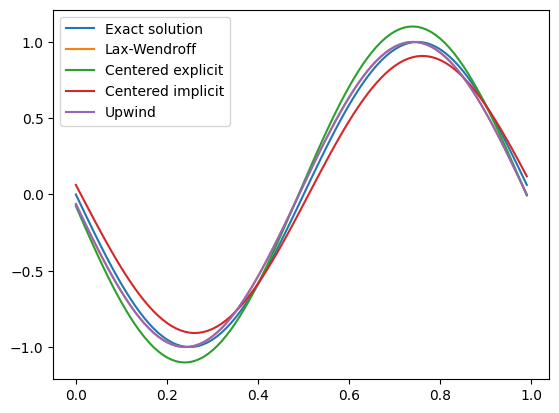

In [126]:
nu = 1
T = 0.5
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u01) for xk in x]
u_lw = lax_wendroff(J,T,n,u01,1)
u_ce = centered_explicit(J,T,n,u01,1)
u_ci = centered_implicit(J,T,n,u01,1)
u_pwd = upwind(J,T,n,u01,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()

### Case $\nu = 2$

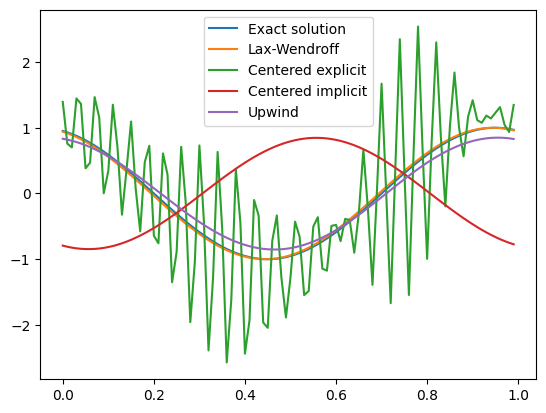

In [104]:
nu = 2
T = 1.7
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u01) for xk in x]
u_lw = lax_wendroff(J,T,n,u01,1)
u_ce = centered_explicit(J,T,n,u01,1)
u_ci = centered_implicit(J,T,n,u01,1)
u_pwd = upwind(J,T,n,u01,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()

### Case $\nu = 0.5$

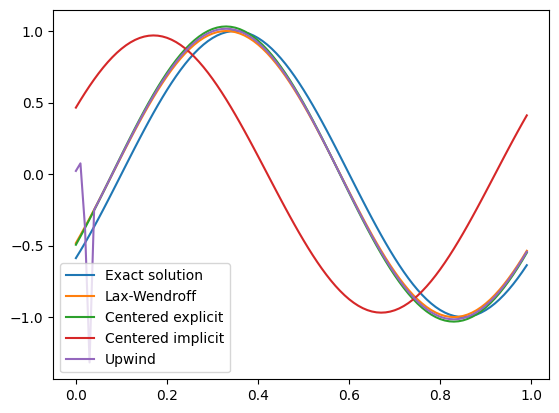

In [107]:
nu = 0.5
T = 0.1
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u01) for xk in x]
u_lw = lax_wendroff(J,T,n,u01,1)
u_ce = centered_explicit(J,T,n,u01,1)
u_ci = centered_implicit(J,T,n,u01,1)
u_pwd = upwind(J,T,n,u01,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()

## Stochastic schemes

In [55]:
def mc(J,T,n,u0,a):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    for i in range(n):
        if np.random.rand() < nu:
            out[i+1,0] = out[i,J-1]
        else:
            out[i+1,0] = out[i,0]
        for k in range(1,J):
            if np.random.rand() < nu:
                out[i+1,k] = out[i,k-1]
            else:
                out[i+1,k] = out[i,k]
    return out

def glimm(J,T,n,u0,a):
    dx,dt = 1/J, T/n
    out = np.zeros((n+1,J))
    out[0,:] = [u0(k*dx) for k in range(0,J)]
    nu = a*dt/dx
    for i in range(n):
        z = np.random.rand()
        if z < nu:
            out[i+1,0] = out[i,J-1]
        else:
            out[i+1,0] = out[i,0]
        for k in range(1,J):
            if z < nu:
                out[i+1,k] = out[i,k-1]
            else:
                out[i+1,k] = out[i,k]
    return out

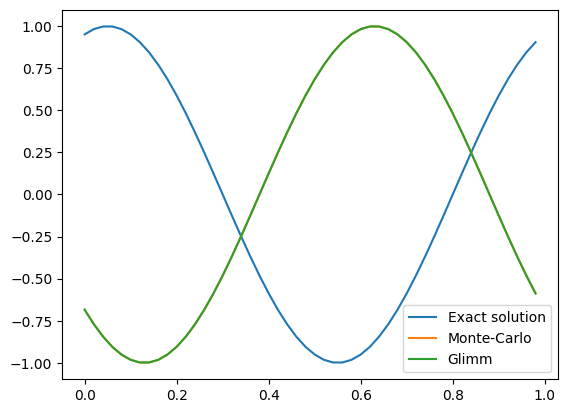

In [115]:
nu = 0.5
T = 0.8
J = 50
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u01) for xk in x]
u_lw = lax_wendroff(J,T,n,u01,1)
u_mc = mc(J,T,n,u01,1)
u_glimm = glimm(J,T,n,u01,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
#ax.plot(x,u_lw[n-1],label="Lax-Wendroff")
ax.plot(x,u_mc[n-1],label="Monte-Carlo")
ax.plot(x,u_glimm[n-1],label="Glimm")
plt.legend()
plt.show()

## Rough initial data

### Case $\nu=1$

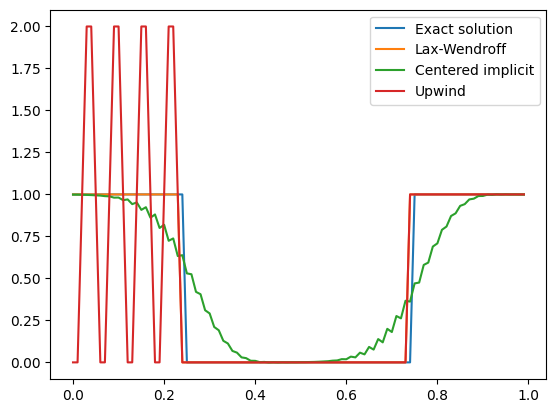

In [118]:
nu = 1
T = 0.5
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u02) for xk in x]
u_lw = lax_wendroff(J,T,n,u02,1)
u_ce = centered_explicit(J,T,n,u02,1)
u_ci = centered_implicit(J,T,n,u02,1)
u_pwd = upwind(J,T,n,u02,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
#ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()

### Case $\nu=2$

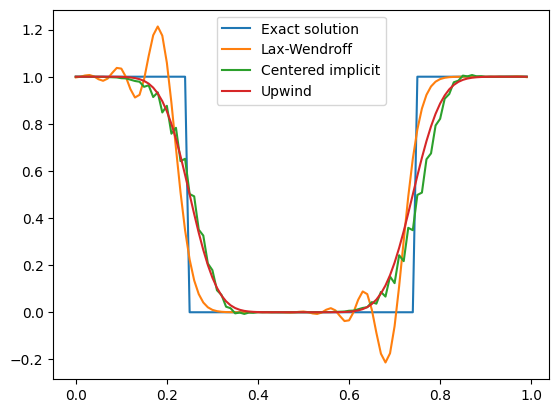

In [120]:
nu = 2
T = 0.5
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u02) for xk in x]
u_lw = lax_wendroff(J,T,n,u02,1)
u_ce = centered_explicit(J,T,n,u02,1)
u_ci = centered_implicit(J,T,n,u02,1)
u_pwd = upwind(J,T,n,u02,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
#ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()

### Case $\nu=0.5$

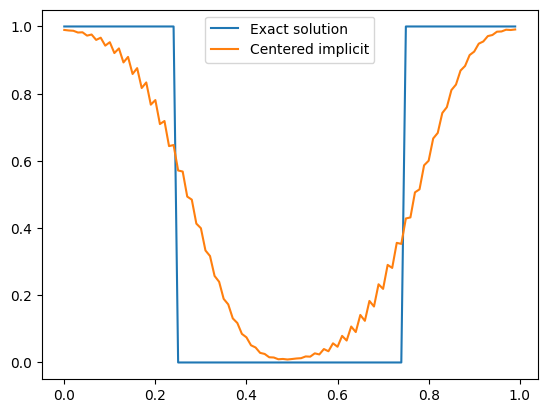

In [124]:
nu = 0.5
T = 0.5
J = 100
n = int(nu*T*J)
x = 1/J*np.array(range(J))
u_ex = [u_sol(xk,T,1,u02) for xk in x]
u_lw = lax_wendroff(J,T,n,u02,1)
u_ce = centered_explicit(J,T,n,u02,1)
u_ci = centered_implicit(J,T,n,u02,1)
u_pwd = upwind(J,T,n,u02,1)
fig, ax = plt.subplots()
ax.plot(x,u_ex,label="Exact solution")
#ax.plot(x,u_lw[n-1,:],label="Lax-Wendroff")
#ax.plot(x,u_ce[n-1],label="Centered explicit")
ax.plot(x,u_ci[n-1],label="Centered implicit")
#ax.plot(x,u_pwd[n-1],label="Upwind")
plt.legend()
plt.show()